<a href="https://colab.research.google.com/github/mariimao/JSC270_HW2_2022_MZhao/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSC270 Assignment 2
Here is the [link](https://github.com/mariimao/JSC270_HW2_2022_MZhao) to my GitHub repo. Below are the import statements copied from the [starter code](https://github.com/UofT-JSC270/JSC270_HW2).

In [198]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [208]:
# import data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       header=None)
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
                    'occupation','relationship','race','sex','capital_gain','capital_loss',
                    'hours_per_week','native_country','gross_income_group']

## Initial Data Exploration

In [209]:
# @title 1. Columns of the data

# print basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [212]:
# @title 2. Missing values
# missing values are indicated with ? as stated in the text description

# go through each column and count the number of ' ?' occurences
for column in df.columns:
    count = (df[column] == ' ?').sum()
    print(f"Column {column} has {count} '?' values.")

# replaces the missing values with np.nan
df = df.replace(' ?', np.NaN)

Column age has 0 '?' values.
Column workclass has 0 '?' values.
Column fnlwgt has 0 '?' values.
Column education has 0 '?' values.
Column education_num has 0 '?' values.
Column marital_status has 0 '?' values.
Column occupation has 0 '?' values.
Column relationship has 0 '?' values.
Column race has 0 '?' values.
Column sex has 0 '?' values.
Column capital_gain has 0 '?' values.
Column capital_loss has 0 '?' values.
Column hours_per_week has 0 '?' values.
Column native_country has 0 '?' values.
Column gross_income_group has 0 '?' values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64


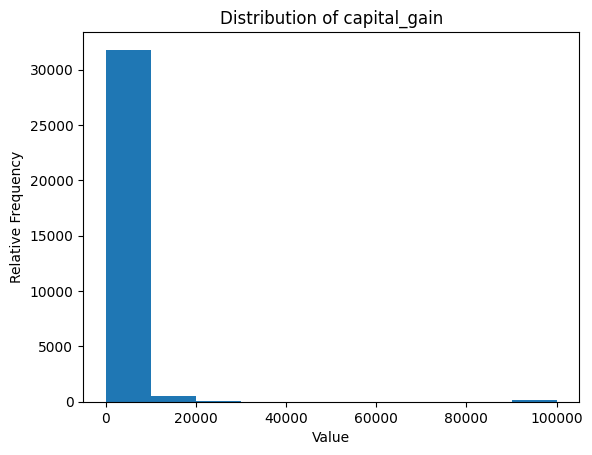

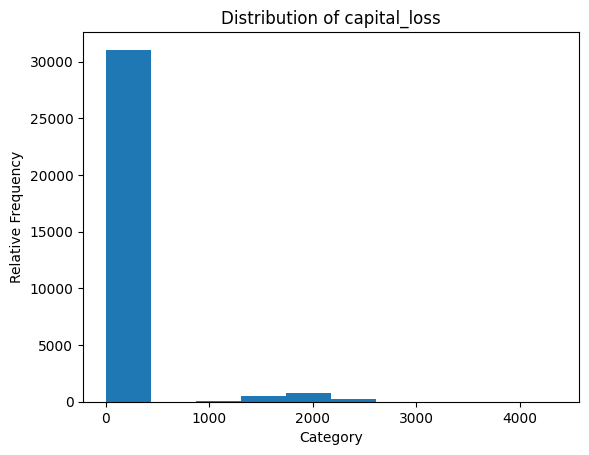

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [214]:
# @title 3. Data transformation and table

# Plot histogram of capital_gain
plt.hist(df.capital_gain, bins = 10)
plt.title('Distribution of capital_gain')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()

# Plot histogram of capital_loss
plt.hist(df.capital_loss, bins = 10)
plt.title('Distribution of capital_loss')
plt.xlabel('Category')
plt.ylabel('Relative Frequency')
plt.show()

df


In [ ]:
# @title 4. Explore distribution of fnlwgt

## Correlation

In [ ]:
# @title 1. Variable correlation

In [ ]:
# @title 2. Correlation coefficient

In [ ]:
# @title 3. Expected results

In [ ]:
# @title 4. Covariance matrix

## Regression

In [ ]:
# @title 1. Explanation of hours_per_week regression

In [ ]:
# @title 2. Control variable

In [ ]:
# @title 3. Model comparison